In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, n_classes)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(self.bn1(x))
        x = self.fc2(x)
        x = F.relu(self.bn2(x))
        x = self.fc3(x)
        x = F.softmax(x, 1)
        
        return x
    
net = SimpleNet(10)
print(net)
summary(net, (64, 28, 28))

In [ ]:
class SimpleNet2(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.BatchNorm1d(256),
            nn.ReLU()
        )
        
        self.block2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU()
        )
        
        self.fc3 = nn.Linear(512, n_classes)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.block1(x)
        x = self.block2(x)
        x = self.fc3(x)
        x = F.softmax(x, 1)
        
        return x
    
net2 = SimpleNet2(10)
print(net2)
summary(net2, (64, 28, 28))

In [ ]:
class SimpleNet3(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        
        self.block1 = self._make_block(28*28, 256)
        self.block2 = self._make_block(256, 512)
        
        
        self.fc3 = nn.Linear(512, n_classes)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.block1(x)
        x = self.block2(x)
        x = self.fc3(x)
        x = F.softmax(x, 1)
        
        return x
    
    def _make_block(self, input_num, output_num):
        return nn.Sequential(
            nn.Linear(input_num, output_num),
            nn.BatchNorm1d(output_num),
            nn.ReLU()
        )
    
net3 = SimpleNet3(10)
print(net3)
summary(net3, (64, 28, 28))

In [ ]:
class SimpleNet4(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        
        self.encoder = nn.Sequential(
            self._make_block(28*28, 256),
            self._make_block(256, 512)
        )
        self.classifier = nn.Linear(512, n_classes)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.classifier(x)
        x = F.softmax(x, 1)
        
        return x
    
    def _make_block(self, input_num, output_num):
        return nn.Sequential(
            nn.Linear(input_num, output_num),
            nn.BatchNorm1d(output_num),
            nn.ReLU()
        )
    
net4 = SimpleNet4(10)
print(net4)
summary(net4, (64, 28, 28))

In [ ]:
class SimpleNet_dynamic(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        
        self.enc_size = [28*28, 256, 256, 512]
        block_list = [self._make_block(in_f, out_f) for in_f, out_f in zip(self.enc_size, self.enc_size[1:])]
        self.encoder = nn.Sequential(*block_list)
        self.classifier = nn.Linear(512, n_classes)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.classifier(x)
        x = F.softmax(x, 1)
        
        return x
    
    def _make_block(self, input_num, output_num):
        return nn.Sequential(
            nn.Linear(input_num, output_num),
            nn.BatchNorm1d(output_num),
            nn.ReLU()
        )
    
net_dynamic = SimpleNet_dynamic(10)
print(net_dynamic)
summary(net_dynamic, (64, 28, 28))

In [ ]:
class MyModule(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        self.enc_size = [28*28, 256, 256, 512]
        self.layers = nn.ModuleList([self._make_block(in_f, out_f) for in_f, out_f in zip(self.enc_size, self.enc_size[1:])])
        #self.layers = [nn.Linear(in_f, out_f) for in_f, out_f in zip(sizes, sizes[1:])] #Wrong
        self.classifier = nn.Linear(self.enc_size[-1], n_classes)
        
    def forward(self,x):
        x = x.view(-1, 28*28)
        for layer in self.layers:
            x = layer(x)
        x = self.classifier(x)
        return x
    
    def _make_block(self, input_num, output_num):
        return nn.Sequential(
            nn.Linear(input_num, output_num),
            nn.BatchNorm1d(output_num),
            nn.ReLU()
        )

moduleNet = MyModule(10)
print(moduleNet)
summary(moduleNet, (64, 28, 28))

# Practice: 5-layer Dense Network를 ModuleList를 이용하여 구성
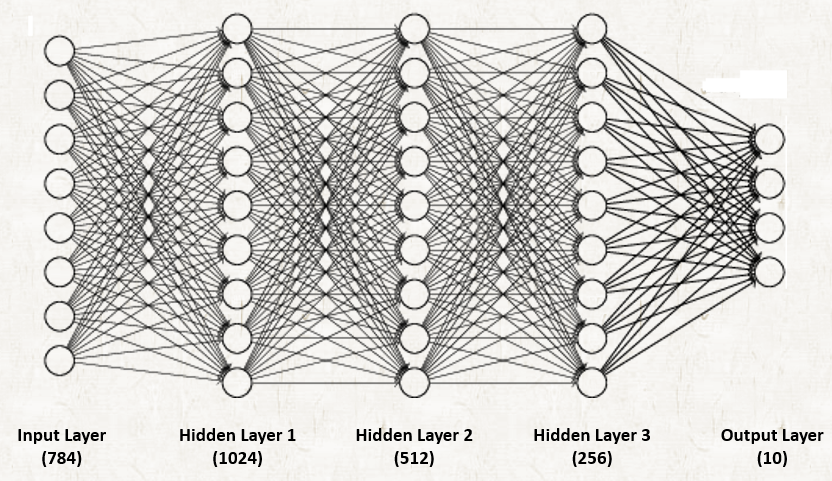

In [ ]:
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.enc_size = [28*28, 1024, 512, 256]
        ###########################
        self.layers = None
        self.classifier = None
        ###########################
        
    def forward(self, x):
        ###########################
       
       
        ###########################
        return x
    
    def _make_block(self, input_num, output_num):
        return nn.Sequential(
            ###########################
            

            ###########################
        )

### summary 확인

In [ ]:
moduleNet = myNet()
print(moduleNet)
summary(moduleNet, (64, 28, 28))